# Mask R-CNN Model for Instance Segmentation

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">



# Install detectron2

In [ ]:
# build the environment with the appropriate libraries
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

  Using cached PyYAML-5.1.tar.gz (274 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
fatal: destination path 'detectron2' already exists and is not an empty directory.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment


In [ ]:
# check versions and validate installation
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.6 ; cuda:  cu124
detectron2: 0.6


**Υπενθύμιση:**
Στο σημείο αυτό, μην ξεχάσετε να αντικαταστήσετε το αρχείο visualizer.py που περιέχει ο κώδικας στο path /content/detectron2/detectron2/utils/visualizer.py με το αρχείο που σας δίνεται. Η αλλαγή αυτή γίνεται προκειμένου κάθε αντικείμενο της ίδιας κλάσης να λαμβάνει τον ίδιο χρωματισμό για να είναι ομοιόμορφο το τελικό βίντεο.

In [ ]:
%cp /content/visualizer.py /content/detectron2/detectron2/utils/visualizer.py

# A quick example

In [ ]:
# Basic libraries imports
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

--2025-05-21 18:43:12--  https://people.ee.ethz.ch/~ihnatova/wespe/cityscapes/before_2.jpg
Resolving people.ee.ethz.ch (people.ee.ethz.ch)... 129.132.52.147, 2001:67c:10ec:36c2::147
Connecting to people.ee.ethz.ch (people.ee.ethz.ch)|129.132.52.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85731 (84K) [image/jpeg]
Saving to: ‘before_2.jpg.4’

before_2.jpg.4      100%[===================>]  83.72K   185KB/s    in 0.5s    

2025-05-21 18:43:14 (185 KB/s) - ‘before_2.jpg.4’ saved [85731/85731]



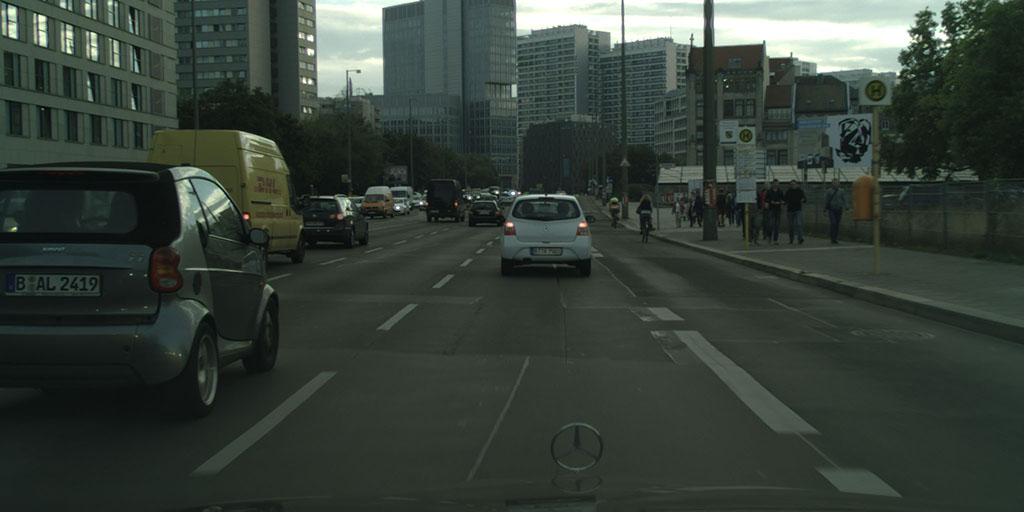

In [ ]:
# Download a picture from the internet
!wget https://people.ee.ethz.ch/~ihnatova/wespe/cityscapes/before_2.jpg

# Read the image in order to provide an input to the network
im = cv2.imread("/content/before_2.jpg")

# Print the image as following
cv2_imshow(im)

Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [ ]:
# load the pretrained model
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("Cityscapes/mask_rcnn_R_50_FPN.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("Cityscapes/mask_rcnn_R_50_FPN.yaml")
predictor = DefaultPredictor(cfg)

# Make the prediction for the given image - INFERENCE
outputs = predictor(im)

[05/21 18:43:22 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/Cityscapes/mask_rcnn_R_50_FPN/142423278/model_final_af9cf5.pkl ...


In [ ]:
# Prediction arrays
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 7, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
        2, 2, 2, 0, 0], device='cuda:0')
Boxes(tensor([[  5.4248, 151.4553, 281.2585, 418.2765],
        [821.4016, 175.8201, 849.7870, 246.5917],
        [634.8239, 192.7933, 654.0904, 241.1802],
        [498.2711, 192.5320, 594.7057, 279.9809],
        [300.7010, 194.1525, 368.3555, 250.2411],
        [762.3364, 178.9434, 786.0196, 245.7637],
        [361.7366, 186.0541, 394.6148, 219.3054],
        [783.8167, 178.6746, 808.0880, 245.0338],
        [467.7129, 200.3029, 505.0816, 227.0986],
        [426.5398, 178.4830, 466.8733, 223.2362],
        [671.0706, 196.6399, 684.5073, 229.0622],
        [146.1663, 126.7350, 307.8594, 269.5244],
        [608.8336, 197.0718, 621.0908, 229.6223],
        [641.7418, 215.1405, 650.1532, 243.7769],
        [347.3041, 196.1409, 364.4315, 212.7818],
        [693.5140, 191.6858, 704.6503, 228.3916],
        [757.3976, 180.6365, 771.2881, 241.9975],
        [391.2736, 186.

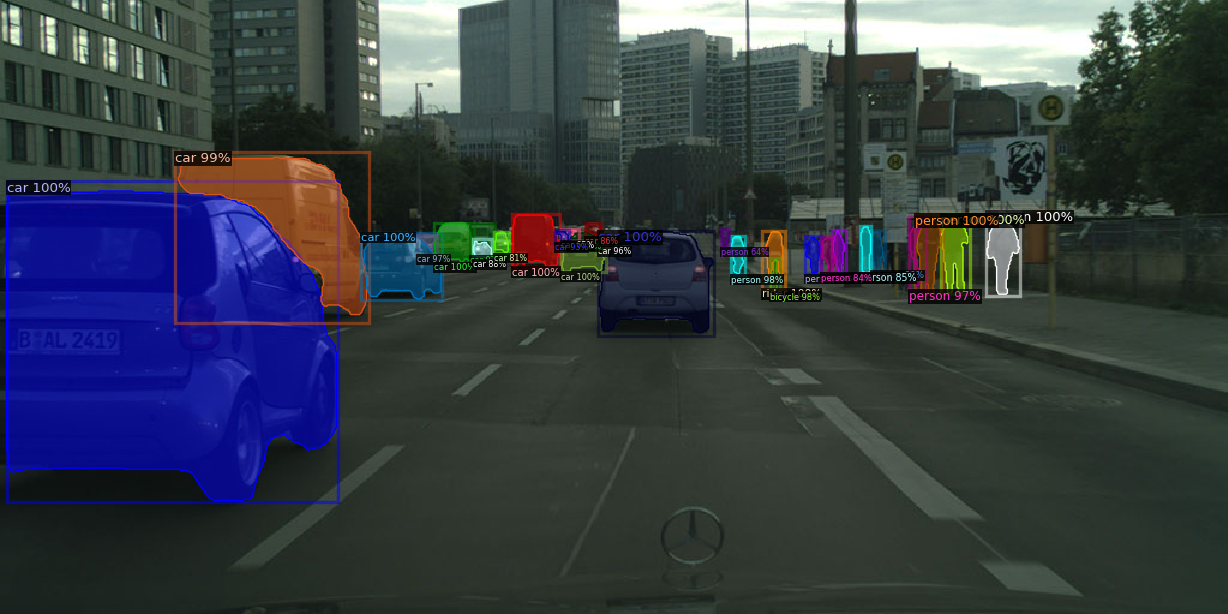

True

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Save the image
result_image = out.get_image()[:, :, ::-1]
save_path = "/content/output.png"
cv2.imwrite(save_path, result_image)

# Google Drive items import

In [ ]:
# Import Google Drive files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Organize image collection

In [ ]:
# Update using your path
#%cp /content/drive/MyDrive/FramesSequence.zip /content/
#!unzip /content/FramesSequence.zip

#Sequential Frame Inference

**Άσκηση:**
Σας ζητείται να πραγματοποιήσετε inference σε μια σειρά από διαδοχικά frames από μια σκηνή οδήγησης. Για τον λόγο αυτό θα πρέπει να χρησιμοποιήσετε τον κώδικα από το παραπάνω παράδειγμα και να συμπληρώσετε κάποια σημεία στον ακόλουθο κώδικα προκειμένου να αυτοματοποιήσετε την διαδικασία του inference για έναν μεγάλο αριθμό από εικόνες.

- Hint 1: Δημιουργήστε μια λίστα που περιέχει τα path όλων των εικόνων για τις οποίες πρέπει να τρέξετε το inference
- Hint 2: Διαβάστε από αυτήν την λίστα ένα ένα τα στοιχεία και δημιουργήστε την κάθε εικόνα ως im = .... όπως στο παράδειγμα
- Hint 3: Αποθηκεύστε την κάθε εικόνα όπως στο παράδειγμα με όνομα το idx που προκύπτει από την for loop π.χ την τρίτη κατά σειρά εικόνα ως 3.png (Γενικά δηλαδή {idx}.png)

In [ ]:
import os
import cv2

# Change the paths if needed based on your folder names
input_folder = "/content/drive/MyDrive/stuttgart_00"
#λόγω του ότι με βόλεψε και δεν κόλλαγε στο στην πλήρη έυρεση του path
# ανέβασα το αρχείο => stuttgart_00 <= με τις εικόνες unziped και δεν έτρεξα το κελί που αφορουσε το unzip του αρχείου FramesSequence καθόλου
#κατανοώ ότι πιάνει πολύ χώρο τσάμπα στο drive αλλά δεν έτρεχε αλλιώς.
output_folder = "/content/video_sequence/"

os.makedirs(output_folder, exist_ok=True)

# load the pretrained model
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("Cityscapes/mask_rcnn_R_50_FPN.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("Cityscapes/mask_rcnn_R_50_FPN.yaml")
predictor = DefaultPredictor(cfg)

# HERE You have to create a list that contains all the file names for each frame.
# For example:
# image1.png
# image2.png
# ....
# imageN.png
# FILL THE FOLLOWING LINE
#images_list = []
images_list = sorted(os.listdir(input_folder))
# Perform Inference and save the result for every image
for idx, image_name in enumerate(images_list, start=1):
    # Create the path for each image dynamically and create the im variable based on the path
    # FILL THE CODE NEEDED
    image_path = os.path.join(input_folder, image_name)
    im = cv2.imread(image_path)
    # Create the corresponding output using predictor
    outputs = predictor(im)

    # Create the visualizer
    v = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get(predictor.cfg.DATASETS.TRAIN[0]), scale=1.0)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Save each image on a specific folder and give the name output_i (Hint: use idx to name each new image)
    # FILL THE CODE NEEDED
    result_image = out.get_image()[:, :, ::-1] #Convert RGB to BGR
    output_path = os.path.join(output_folder, f"frame_{idx:04d}.png")
    cv2.imwrite(output_path, result_image)

[05/21 18:43:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/Cityscapes/mask_rcnn_R_50_FPN/142423278/model_final_af9cf5.pkl ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Video Creation

Αφού έχετε ετοιμάσει τις εικόνες ως αποτέλεσμα του inference, τώρα πρέπει να τις συνθέσετε σε μορφή βίντεο χρησιμοποιώντας τον ακόλουθο κώδικα, απλά αλλάζοντας τα paths για την ανάγνωση/εγγραφή των αρχείων.

In [ ]:
from moviepy.editor import ImageSequenceClip
import os

# Define the paths based on your folders name
image_folder = '/content/video_sequence'
video_name = '/content/Video_Kokosalakis.mp4'

# load all the images and sort them
images = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort(key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split("_")[1]))
#εδώ το μετέτρεψα έτσι γιατί χωρίς το => .split("_")[1] <= έπαιρνε ολόκληρο το όνομα του αρχείου
#π.χ. "frame_0016" και προσπαθούσε να το μετατρέψει σε int(), που οδηγούσε σε σφάλμα
#μόλις το άλλαξα πήρα το video κανονικά στο φάκελο που είχα ορίσει

# create video by giving the appropriate fps value
clip = ImageSequenceClip(images, fps=17) # change fps value
clip.write_videofile(video_name, codec='libx264')

print(f"Video saved as {video_name}")

Moviepy - Building video /content/Video_Kokosalakis.mp4.
Moviepy - Writing video /content/Video_Kokosalakis.mp4



Moviepy - Done !
Moviepy - video ready /content/Video_Kokosalakis.mp4
Video saved as /content/Video_Kokosalakis.mp4
